In [ ]:
# import dependencies
import random 
import pandas as pd 
import time 
from datetime import datetime
import requests
import json
import seaborn as sns 
import matplotlib.pyplot as plt # for creating/plotting graphs
import numpy as np
import openweathermapy as owm
from api_keys import api_key

In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy 
cities = []

while len(cities)<10:
    lats = (random.choice(range(-90,90))) 
    lngs = (random.choice(range(-180,180))) 
    city = citipy.nearest_city(lats,lngs).city_name 
    if city not in cities:
        cities.append(city)

len(cities)

10

In [3]:
# setting up url dictionaries
settings = {"units": "imperial", "appid": api_key}

# Setting API calls
cities_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                    "Date", "Max Temp", "Wind Speed", 
                                    "Lat","Lng", "Humidity"])

cities_df.head()

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity


In [4]:
#Calling API
count = 1 
sets = 1 
index = 0 
err = 0


base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
print(f'Beginning Data Retrieval')
print("--------------------------")

for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )

        response = requests.get(base_url)
        result = owm.get_current(city, **settings)
        cities_df.set_value(index, "City", result["name"])
        cities_df.set_value(index, "Cloudiness", result("clouds.all"))
        cities_df.set_value(index, "Country", result("sys.country"))
        cities_df.set_value(index, "Date", result("dt"))
        cities_df.set_value(index, "Max Temp", result("main.temp_max"))
        cities_df.set_value(index, "Wind Speed", result("wind.speed"))
        cities_df.set_value(index, "Lat", result("coord.lat"))
        cities_df.set_value(index, "Lng", result("coord.lon"))
        cities_df.set_value(index, "Humidity", result("main.humidity"))

        
        index = index +1 
    except :
        print('City not found. Skipping...')
        err= err+1
    
    
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        count = 1 
        sets = sets+1

        

print("--------------------------")
print(f'Data Retrieval Complete ')
print("--------------------------")


Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1 | pisco


/Users/taouficgandi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/taouficgandi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/taouficgandi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/taouficgandi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/taouficgandi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. 

Processing Record 2 of Set 1 | lagoa
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | victoria
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | ostersund
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | lolua
City not found. Skipping...
Processing Record 9 of Set 1 | conguaco
Processing Record 10 of Set 1 | dikson
--------------------------
Data Retrieval Complete 
--------------------------


In [5]:
# Display the count of cities with weather data
cities_df.count()

City          9
Cloudiness    9
Country       9
Date          9
Max Temp      9
Wind Speed    9
Lat           9
Lng           9
Humidity      9
dtype: int64

In [6]:
# Export to a csv
cities_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)

# Display the DataFrame
cities_df.head(10)

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Pisco,0,PE,1554782400,71.6,5.82,-13.71,-76.2,83
1,Lagoa,40,PT,1554784338,57.2,12.75,37.14,-8.45,76
2,Hilo,90,US,1554784461,77,6.93,19.71,-155.08,69
3,Victoria,75,BN,1554782400,91,4.7,5.28,115.24,70
4,Torbay,20,CA,1554784412,25,18.34,47.66,-52.73,67
5,Ostersund,0,SE,1554784318,21.2,9.17,63.18,14.64,57
6,Ribeira Grande,92,PT,1554784381,60.98,24.34,38.52,-28.7,94
7,Conguaco,0,GT,1554784519,73.04,2.53,14.05,-90.03,90
8,Dikson,68,RU,1554784520,17.87,10.13,73.51,80.55,100


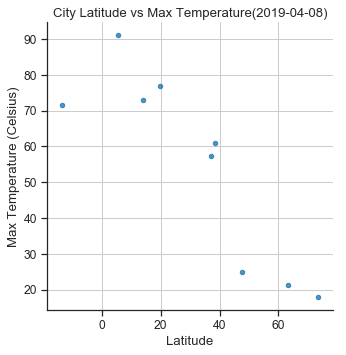

In [7]:
#Latitude vs. Temperature Plot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Max Temp',
          data=cities_df,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.title(f"City Latitude vs Max Temperature({datetime.now().date()})")
plt.show()

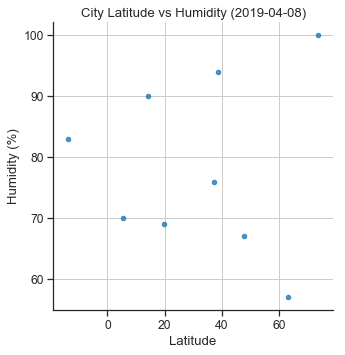

In [8]:
# Latitude vs. Humidity Plot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Humidity',
          data=cities_df,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.show()

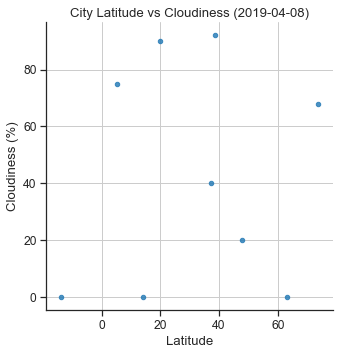

In [9]:
# Latitude vs. Cloudiness Plot

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Cloudiness',
          data=cities_df,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.show()


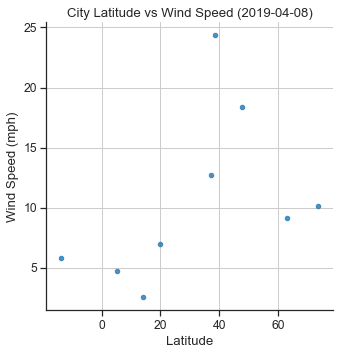

In [10]:
#Latitude vs. Wind Speed Plot


sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Wind Speed',
          data=cities_df,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.show()
